In [1]:
import warnings
warnings.filterwarnings('ignore')

# <span style="color:Maroon">Case Study: Usage of Data Science in Entertainment Industry.

#### <span style="color:Green">Select optimal advetisement to display in break time for a TV Show, based on what was recently shown in the TV

## <span style="color:Maroon">Logistic Regression Classifier

<span style="color:Green">In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import os as os
np.random.seed(0)
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [3]:
# Setting the working directory to the folder
direc = os.getcwd()
os.chdir("..//Data//")

In [4]:
# Read the data in pandas dataframe
data = pd.read_csv("Dataset.csv")
data = data.fillna(0)

In [5]:
# Dependent variable (is given name of target)
target = 'h_food_str'
# Other dependent variables (These should be dropped from our dataset)
dv_list = ['h_alcohol_str', 'h_hot_drink_str', 'h_phone_str']
# drop the dv_list from the data (as In future, these labels won't be available to us (dv_list).
# Hence, for our modeling purpose, these variables are being dropped from the data.)
data = data.drop(dv_list, axis=1)

In [6]:
# One hot encoding of 'show_name' variable
df1 = pd.get_dummies(data['show_name'], prefix = 'show_name')
data = data.join(df1)
data.head()

,show_name,time_offset,r_abies,r_abyssinian,r_accessories,r_accipiter,r_acorn,r_adapter,r_adorable,r_adventure,...,r_zoo,h_food_str,show_name_fresh_meat,show_name_friday_night_dinner,show_name_hollyoaks,show_name_made_in_chelsea,show_name_made_in_chelsea_la,show_name_my_mad_fat_diary,show_name_peep_show,show_name_the_inbetweeners
0,fresh_meat,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,fresh_meat,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
2,fresh_meat,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
3,fresh_meat,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
4,fresh_meat,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0


### <span style="color:Maroon">Train-Test Split
<span style="color:Green">Divide the data in 70:30 ratio for training the model and validating the model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop([target],axis=1), data[target], test_size=0.30, 
                                                    random_state=12345)

In [9]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [10]:
# Check if the random samples have similar mean
print (f"Train Dependent variable: {np.round(np.mean(y_train)*100,2)}")
print (f"Test Dependent variable: {np.round(np.mean(y_test)*100,2)}")

Train Dependent variable: 8.83
Test Dependent variable: 8.85


__Comments:__ The means of dependent variable are very similar in test and train dataset

### <span style="color:Maroon">Logistic Regression Model

In [11]:
# Import required libraries
from sklearn import linear_model
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

<span style="color:Green">__To do variable reduction__, we shall start with the all variables:

<span style="color:Green">$\;\;\;\;\;\;$Step 1: Variables with __cumulative proportional IV of 0.95__
    
<span style="color:Green">$\;\;\;\;\;\;$Step 2: Reduce the dimensions using PCA and then recalculate the IV to find relevant variables.

In [12]:
""" Logistic Regression with sklearn with p values. The internal sklearn logistic regression model doesnot provide 
   the p-values"""

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        pass

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        pass

In [13]:
# Use PCA to reduce dimensionality of the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [14]:
# Imported from last model (based on Naive model)
food_related_vars = ['show_name_fresh_meat', 'r_cafeteria', 'r_meal', 'r_dinner', 'r_supper', 'r_food', 'r_restaurant',
                     'r_food_court', 'r_cafe', 'r_plate', 'r_dish', 'show_name_friday_night_dinner',
                     'show_name_made_in_chelsea_la', 'r_glass', 'show_name_the_inbetweeners', 'r_hot_pot', 'r_beverage', 
                     'show_name_hollyoaks', 'r_drink', 'r_eating', 'r_breakfast', 'r_beard', 'r_wine', 'r_goblet', 
                     'r_pub', 'r_bar_counter', 'r_alcohol', 'r_lunch', 'r_platter', 'r_cup', 'r_apartment', 
                     'show_name_made_in_chelsea', 'show_name_my_mad_fat_diary', 'r_dining_table', 'r_cookie', 'r_kitchen',
                     'r_pantry', 'r_glasses', 'r_oven', 'r_wine_glass']

In [15]:
# Standardize the variables with zero mean and unit variance
X = X_train[food_related_vars]

# Standardizing the features
StdSclr = StandardScaler().fit(X)
X1 = StdSclr.transform(X)

In [16]:
# PCA transformation
import matplotlib.pyplot as plt
pca = PCA()
pcafit = pca.fit(X1)

In [17]:
os.chdir("..//Images//")

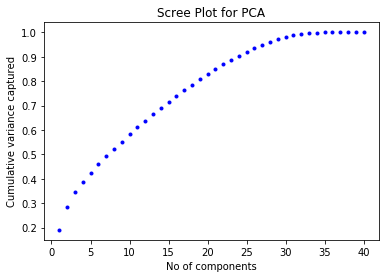

In [18]:
# Scree plot
variance_explained = pca.explained_variance_ratio_
cum_variance_explained = variance_explained.cumsum()
no_of_components = np.arange(1,len(cum_variance_explained)+1)
plt.plot(no_of_components, cum_variance_explained, 'b.')
plt.xlabel("No of components")
plt.ylabel("Cumulative variance captured")
plt.title("Scree Plot for PCA")
plt.savefig("PCA_ScreePlot_train.png")
plt.show()

<span style="color:Blue">__Comment:__ Top 25-30 components caputre >95% of the dataset variance

In [19]:
# Based on scree plot, we see that almost 25-30 PC's will caputre 95% of the variance in the data
pca = PCA(0.95)
pcafit = pca.fit(X1)
pricipalComponents = pcafit.transform(X1)

In [20]:
# Convert it to a datafrmae
arr = list(np.arange(0,pricipalComponents.shape[1],1))
colnames = [("PCA_"+str(ar)) for ar in arr]
principalDf_train = pd.DataFrame(data = pricipalComponents, columns = colnames)
principalDf_train.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27
0,-0.815713,0.116294,-0.255514,-0.150948,0.546745,-0.063195,-1.554669,-0.860160,-0.102172,-0.106118,...,-1.263866,0.316197,0.292678,0.059399,-0.131413,-0.051578,0.253994,-0.152571,0.162377,-0.013724
1,-0.883071,0.444792,0.025575,-0.212775,-0.017678,-0.466631,-0.070329,0.163309,-0.308609,-1.039853,...,0.101822,0.492615,-0.359974,0.107832,0.087555,0.026761,0.047219,-0.013162,-0.023783,-0.055268
2,-0.739311,0.097482,-0.316266,0.400310,0.530650,-1.145623,0.677319,0.526697,-0.728674,0.806891,...,-0.335696,0.418086,0.780275,-1.007306,0.148010,-0.025541,0.495970,-0.290328,0.083770,0.018754
3,-0.883071,0.444792,0.025575,-0.212775,-0.017678,-0.466631,-0.070329,0.163309,-0.308609,-1.039853,...,0.101822,0.492615,-0.359974,0.107832,0.087555,0.026761,0.047219,-0.013162,-0.023783,-0.055268
4,-0.888543,0.434544,0.370145,-0.461775,-0.322002,0.266839,0.255404,-1.331432,-1.298469,-0.152470,...,0.328649,-0.305219,-0.259553,0.188678,0.038871,0.117907,-0.049202,0.095310,-0.101077,0.214127


In [21]:
# Do the conversion for test dataste as well
Xtest = StdSclr.transform(X_test[food_related_vars])
pricipalComponents = pcafit.transform(Xtest)
arr = list(np.arange(0,pricipalComponents.shape[1],1))
colnames = [("PCA_"+str(ar)) for ar in arr]
principalDf_test = pd.DataFrame(data = pricipalComponents, columns = colnames)
principalDf_test.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27
0,-0.907787,0.377643,0.078355,-0.255249,-0.022553,-0.215828,0.328460,-0.376633,2.092795,0.220593,...,0.094487,-0.030555,-0.032961,-0.064436,0.034206,0.018118,0.129943,-0.005163,0.054254,-0.064347
1,-0.907787,0.377643,0.078355,-0.255249,-0.022553,-0.215828,0.328460,-0.376633,2.092795,0.220593,...,0.094487,-0.030555,-0.032961,-0.064436,0.034206,0.018118,0.129943,-0.005163,0.054254,-0.064347
2,2.131467,-3.708705,4.676116,0.340882,1.432543,1.273170,0.646906,-0.015388,0.370775,-1.887765,...,0.314641,0.860838,1.284694,0.184377,0.036401,0.281326,0.471585,0.291982,0.957243,-1.892229
3,-0.907787,0.377643,0.078355,-0.255249,-0.022553,-0.215828,0.328460,-0.376633,2.092795,0.220593,...,0.094487,-0.030555,-0.032961,-0.064436,0.034206,0.018118,0.129943,-0.005163,0.054254,-0.064347
4,-0.888543,0.434544,0.370145,-0.461775,-0.322002,0.266839,0.255404,-1.331432,-1.298469,-0.152470,...,0.328649,-0.305219,-0.259553,0.188678,0.038871,0.117907,-0.049202,0.095310,-0.101077,0.214127


##### <span style="color:Maroon">Recursive Feature selection method:
<span style="color:Green">Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

<span style="color:Green">$\;\;\;\;\;\;$1. RFECV performs RFE in a cross-validation loop to find the optimal number of features.
    
<span style="color:Green">$\;\;\;\;\;\;$2. For more information, please refer the below link: https://scikit-learn.org/stable/modules/feature_selection.html#rfe

In [22]:
# Recursive Feature Selection method
from sklearn.feature_selection import RFE
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 50)
rfe = rfe.fit(principalDf_train, y_train)

In [23]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
rfe_varred = pd.DataFrame(principalDf_train.columns)
rfe_varred.columns = ["variables"]
rfe_varred["support"] = rfe.support_
sel_vars = list(rfe_varred[rfe_varred["support"]==True]["variables"])
print(len(sel_vars), " variables were selected")

28  variables were selected


In [25]:
# Fitting a regression model
# Fit the model on the train sample
reg = LogisticRegression_with_p_values()
reg.fit(principalDf_train[sel_vars], y_train)

In [26]:
# Estimate table, with p-values
feature_name = principalDf_train[sel_vars].columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
print(summary_table)

   Feature name  Coefficients       p_values
0     Intercept     -4.989078            NaN
1         PCA_0      0.466568  2.873571e-216
2         PCA_1      0.073561   1.647844e-03
3         PCA_2     -0.158645   5.258805e-09
4         PCA_3      0.488165   3.477604e-89
5         PCA_4     -0.105058   1.012420e-02
6         PCA_5     -0.092215   7.248815e-03
7         PCA_6      0.044566   6.388962e-01
8         PCA_7      0.937391   2.823230e-64
9         PCA_8     -2.753777   7.510280e-74
10        PCA_9      0.197894   7.218215e-06
11       PCA_10     -0.350748   1.495908e-07
12       PCA_11     -0.109167   1.525045e-01
13       PCA_12     -0.805697  2.126174e-106
14       PCA_13      0.069196   5.322245e-01
15       PCA_14      0.970787   1.686582e-57
16       PCA_15     -0.074162   2.621501e-01
17       PCA_16      0.381316   1.432636e-18
18       PCA_17     -0.525572   8.739105e-24
19       PCA_18      0.149188   4.340545e-02
20       PCA_19     -0.242152   8.054731e-09
21       P

All variables are statistically significant.

In [27]:
# Predict probabilities for training sample
y_hat = reg.model.predict_proba(principalDf_train[sel_vars])

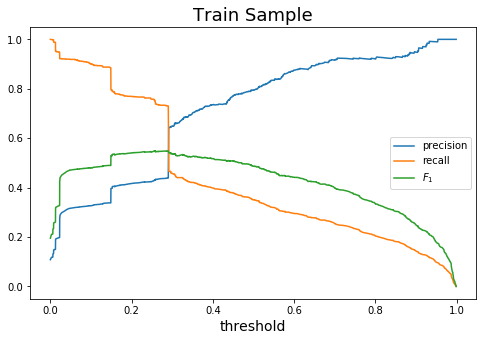

In [28]:
# Plot precision, recall and F1 score for train sample (Logistic)
from sklearn import metrics
precision, recall, threshold = metrics.precision_recall_curve(y_train, y_hat[:,1])
f1_score = 2*precision*recall/(precision + recall)
threshold = np.hstack((0, threshold))
plt.figure(figsize=(8,5))
plt.plot(threshold, precision)
plt.plot(threshold, recall)
plt.plot(threshold, f1_score)
plt.xlabel('threshold', fontsize=14)
plt.title("Train Sample", fontsize=18)
plt.legend(['precision', 'recall', '$F_1$'])
plt.savefig("Train_Logistic_Precision_Recall_F1.png")
plt.show()

##### <span style="color:Maroon">Propensity Threshold selection to tag class as '1' or '0'
<span style="color:Green">To identify the threshold (on model propensity output) to tag class as '1' or '0', we shall use the ROC curve. ROC curve is drawn by using FPR as x-axis and TPR as y-axis. Since TPR is equivalent to sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot. For more details please refer the below link: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [29]:
# Find the optimum threshold on propensity to tag class as 1 or 0
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_hat[:,1])

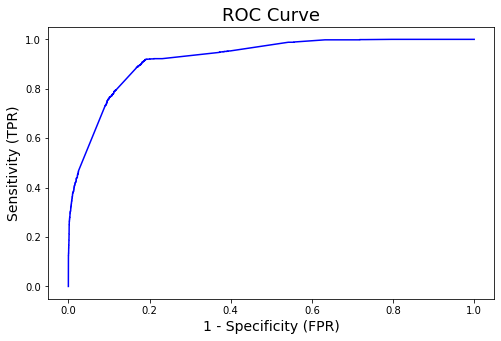

In [30]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, 'b-')
plt.xlabel("1 - Specificity (FPR)", fontsize=14)
plt.ylabel("Sensitivity (TPR)", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig("Logistic_ROC_curve.png")
plt.show()

In [31]:
y_hat = reg.model.predict_proba(principalDf_train[sel_vars])
y_train_out = np.where(y_hat[:,1] > thresholds[np.argmax(tpr - fpr)],1,0)
# Performance metrics of the model

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Performance Metrics for Training Sample")
print(classification_report(y_train, y_train_out))

tmp = pd.DataFrame(y_train, columns=["Actual"])
tmp["Predicted"] = y_train_out
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\nConfusion Matrix\n")
print(pd.crosstab(tmp["Actual"],tmp["Predicted"]))

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Performance Metrics for Training Sample
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     10573
           1       0.32      0.92      0.47      1024

    accuracy                           0.82     11597
   macro avg       0.65      0.86      0.68     11597
weighted avg       0.93      0.82      0.85     11597

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Confusion Matrix

Predicted     0     1
Actual               
0          8568  2005
1            84   940


In [32]:
y_hat = reg.model.predict_proba(principalDf_test[sel_vars])
y_test_out = np.where(y_hat[:,1] > thresholds[np.argmax(tpr - fpr)],1,0)
# Performance metrics of the model

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Performance Metrics for Test Sample")
print(classification_report(y_test, y_test_out))

tmp = pd.DataFrame(y_test, columns=["Actual"])
tmp["Predicted"] = y_test_out
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\nConfusion Matrix\n")
print(pd.crosstab(tmp["Actual"],tmp["Predicted"]))

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Performance Metrics for Test Sample
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4531
           1       0.33      0.92      0.48       440

    accuracy                           0.83      4971
   macro avg       0.66      0.87      0.69      4971
weighted avg       0.93      0.83      0.86      4971

+++++++++++++++++++++++++++++++++++++++++++++++++++++

Confusion Matrix

Predicted     0    1
Actual              
0          3711  820
1            37  403


<span style="color:Blue">__Comments:__ The logistic model based on priciple components performs better than the both Naive Models on all metrics (Accuracy, recall, precision and F1-score)